In [35]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import sem
import scipy.io
import itertools
import os
import h5py
import pyret
import binary     # in igor >> recording

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
from matplotlib.pyplot import *

# note that nonposx(y) for log plots will no longer work with this package
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Predictive Coding Correlation Experiments/')

### Load ganglion cell spiking and inhibitory interneuron membrane potential  
ganglion is cell array of which playback experiment (0,1,2) >> which cell (0, ..., 13) >> which spike timestamp  
surround is cell array of which playback experiment (0,1,2) >> membrane potential

In [3]:
ganglion_files = ['012514_ganglions_0.mat','012514_ganglions_1.mat','012514_ganglions_2.mat']
surround_files = ['012514_c1_s0_0_300.txt','012514_c1_s1_0_300.txt','012514_c1_s2_0_300.txt']

ganglion = []
surround = []

# load ganglion cell spiking files
for g_file in ganglion_files:
    tmp = scipy.io.loadmat(data_dir + g_file, squeeze_me=True)
    cells = [tmp['spikes'][:,c][tmp['spikes'][:,c] > 0] for c in range(tmp['spikes'].shape[1])]
    ganglion.append(cells)
    
# load surround membrane potential
for s_file in surround_files:
    tmp = np.loadtxt(data_dir + s_file, dtype='float', skiprows=1)
    surround.append(tmp)

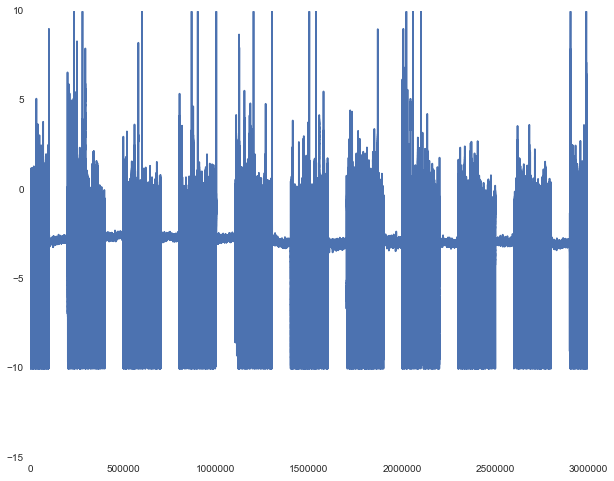

In [4]:
plot(surround[0])

### Copy Table0:info conditions information

In [10]:
control_time = [[10.5, 20.], [0.5, 10.], [20.5, 30.]]
amplify_time = [[20.5, 30.], [10.5, 20.], [0.5, 10.]]
diminish_time = [[0.5, 10.], [20.5, 30.], [10.5, 20.]]

# Look at ganglion firing rates in the amplify, diminish, and control conditions

In [58]:
num_seconds = 0.95*300./3
control_firing_rate = []
amplify_firing_rate = []
diminish_firing_rate = []
for idp, playback in enumerate(ganglion):
    for idc, cell in enumerate(playback):
        ctrl = [spike for spike in cell if spike % 30 > control_time[idp][0] and spike % 30 < control_time[idp][1]]
        amp  = [spike for spike in cell if spike % 30 > amplify_time[idp][0] and spike % 30 < amplify_time[idp][1]]
        dim  = [spike for spike in cell if spike % 30 > diminish_time[idp][0] and spike % 30 < diminish_time[idp][1]]
        control_firing_rate.append(len(ctrl)/num_seconds)
        amplify_firing_rate.append(len(amp)/num_seconds)
        diminish_firing_rate.append(len(dim)/num_seconds)
        
firing_rates = np.array([control_firing_rate, amplify_firing_rate, diminish_firing_rate]).T
cell_means   = np.mean(firing_rates, axis=1)
relative_firing_rates = 100. * ((firing_rates.T - cell_means)/cell_means).T # percent firing increase/decrease

## All firing rates

(-0.5, 2.5)

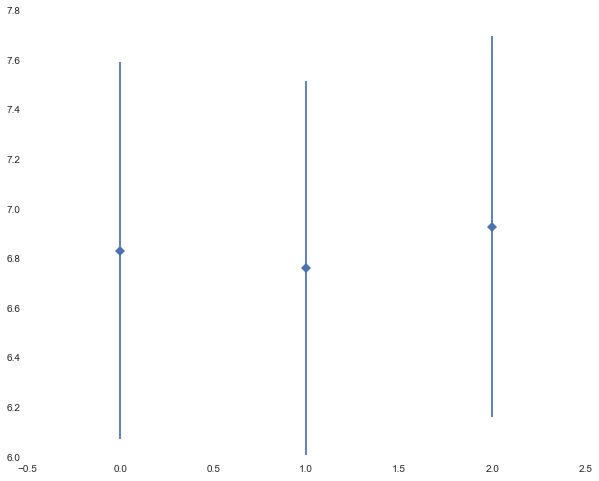

In [59]:
frs = [np.mean(control_firing_rate), np.mean(amplify_firing_rate), np.mean(diminish_firing_rate)]
sems = [sem(control_firing_rate), sem(amplify_firing_rate), sem(diminish_firing_rate)]
errorbar([0,1,2], frs, yerr=sems, fmt='D')
xlim([-.5, 2.5])

# Average increase/decrease in relative firing rates

(-0.5, 2.5)

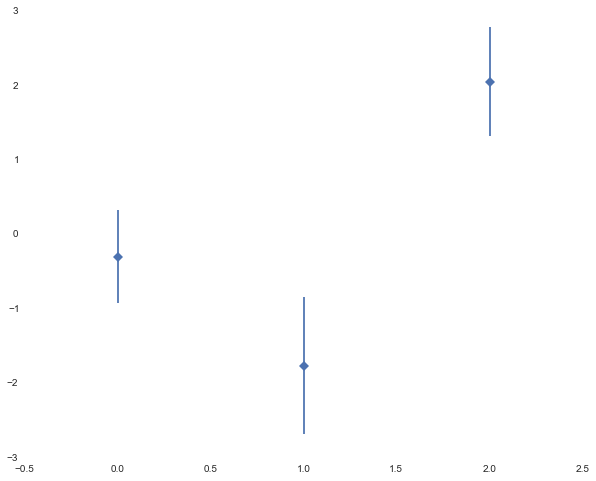

In [61]:
frs = np.mean(relative_firing_rates, axis=0)
sems = sem(relative_firing_rates)
errorbar([0,1,2], frs, yerr=sems, fmt='D')
xlim([-.5, 2.5])

### According to conversation with David, 0-1 is control, 2-3 is amplify, and 4-5 is diminish for 1/25/14 experiment, whereas 0-1 is control, 2-3 is diminish, 4-5 is amplify for 4/4/12 experiment.  

### From this firing rate plot however, it must always be 0-1 control, 2-3 diminish, 4-5 amplify.